# Learning and Intelligent Decision Making

## Laboratory: Reinforcement learning


### 1. The key world domain

Consider once again the gridworld domain from the previous lab and which you modeled using a Markov decision problem.

<img src="https://ead.puc-rio.br/pluginfile.php/2512172/mod_resource/content/1/maze.png" width="200px" />

Recall that:

* At each step, the agent may move in any of the four directions -- up, down, left and right.

* Movement across a _grey_ cell division succeeds with a $0.8$ probability and fails with a $0.2$ probability.

* Movements across colored cell divisions (blue or red) succeed with a $0.8$ probability _but only if the agent has the corresponding colored key_. Otherwise, they fail with probability $1$.

* When the movement fails, the agent remains in the same cell.

* To get a colored key, the agent simply needs to stand in the corresponding cell.

* The goal of the agent is to reach the cell marked with **"G"**.

Throughout the lab, use $\gamma=0.99$. As seen in the previous lab, this problem can be modeled as a Markov decision problem $(\mathcal{X},\mathcal{A},\{\mathbf{P_a}\},c,\gamma\}$ as follows.

In [12]:
%matplotlib notebook
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
np.set_printoptions(precision=2, suppress=True)

# States
S = ['1BR', '2', '2R', '2BR', '3', '3R', '3BR', '4', '4R', '4BR', '5', '5R', '5BR', '6BR', '7R', '7BR']
num_states = len(S)
# Actions
A = ['U', 'D', 'L', 'R']
num_actions = len(A)

# Transition probabilities
U = np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2]])

D = np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

L = np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.8, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.2, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

R = np.array([[0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.8, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

P = [U, D, L, R]

# Reward function

Rw = np.array([[0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [1.0, 1.0, 1.0, 1.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0]])

# Discount rate

gamma = 0.99

---

#### Activity 1.        

Compute the optimal $Q$-function for the MDP defined above using value iteration. As your stopping condition, use an error between iterations smaller than `1e-8`.

---

In [ ]:
import time
import matplotlib.pyplot as plt
# Use inline backend for better compatibility with Google Colab
#%matplotlib notebook
%matplotlib inline

def get_q_values(V: np.ndarray) -> np.ndarray:
  """Calcula Q-values de uma dada state-value function V."""
  return Rw + gamma * np.array(P).dot(V).T

def value_iteration(P, Rw, gamma, theta=1e-8):
  """
  Executa o algoritmo Value Iteration.

  Retorna:
      V (np.array): A função de valor ótima V*.
      i (int): O número de iterações para convergir.
      execution_time (float): O tempo de execução em segundos.
  """
  nS, nA = Rw.shape

  V_star_vi = np.zeros(nS)
  iterations_vi = 0
  start_time = time.time()
  norms_vi = []
  while True:
    iterations_vi += 1
    delta = 0


    for s in range(nS):
      v_old = V_star_vi[s]

      # Calcula Q-values do estado s
      q_values_s = get_q_values(V_star_vi)[s]

      # Vincula o valor da melhor ação com o estado atual
      V_star_vi[s] = np.max(q_values_s)

      # Compara a distântica da iteração atual com a última
      delta = max(delta, np.abs(V_star_vi[s] - v_old))
      norms_vi.append(np.linalg.norm(V_star_vi[s] - v_old))

    # Para quando a convergência alcança o limiar de 10⁻⁸
    if delta < theta:
      break

  # Calcula a Q-function ótima final usando a V-function ótima
  Q_star_vi = get_q_values(V_star_vi)

  end_time = time.time()
  execution_time = end_time - start_time

  print(f"Convergência alcançada em {iterations_vi} iterações.")
  print(f"Tempo de execução: {execution_time:.4f} segundos.")
  plt.figure(figsize=(10, 6))
  plt.plot(norms_vi)
  plt.xlabel('Iteration')
  plt.ylabel('Norm of the difference (||V* - V||)')
  plt.title('Convergence of Value Iteration')
  plt.grid(True)
  return V_star_vi, iterations_vi, Q_star_vi, execution_time, norms_vi

Convergência alcançada em 1834 iterações.
Tempo de execução: 1.1335 segundos.
[ 95.1   89.32  93.92  96.31  88.21  92.75  97.52  90.45  92.75  97.52
  89.32  91.59  98.75 100.    91.59  96.31]
[96.31 95.34 95.34 95.34]


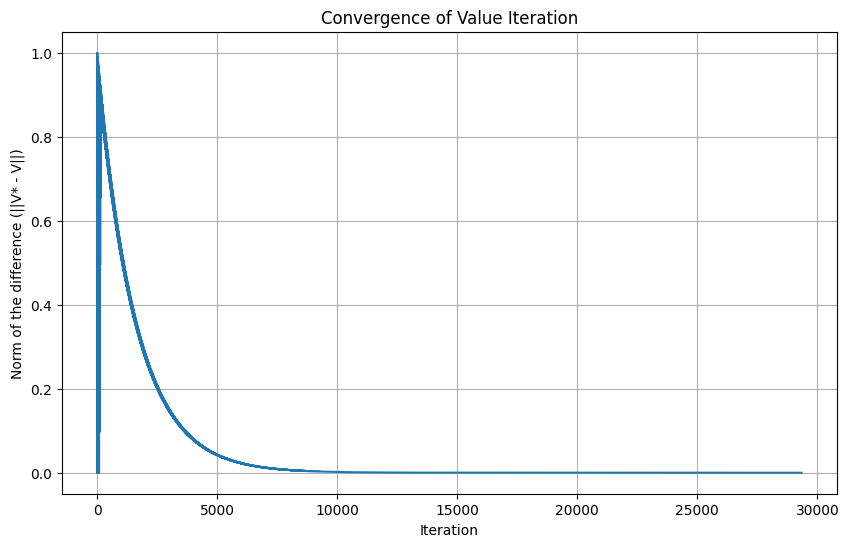

In [14]:
V_star_vi, iterations_vi, Q_star_vi, time_vi, norms_vi = value_iteration(P=P, Rw=Rw, gamma=gamma)
print(V_star_vi)
print(Q_star_vi)

---

#### Activity 2.        

Write down a Python function that, given a Q-function $Q$ and a state $s$, selects an action using the $\epsilon$-greedy policy. Specifically, your function should receive as input a Q-function $Q$, a state $s$, and a probability $\epsilon$ with a default value `eps=0.1`. Your function should return:

* a random action with a probability $\\epsilon$,
* an action corresponding to the maximum value of `Q` with a probability $1-\epsilon$. If more than one action has the same maximum `Q` value, the function should select one of these actions **uniformly at random**.

---

In [15]:
import numpy as np

# Função epsilon-greedy
def egreedy(Q, state, eps=0.1):
    p = np.random.random()
    if p < eps:
        # Exploration
        action = np.random.choice(num_actions)
    else:
        # Exploitation
        action = np.argmax(Q[state, :])
    return action

### 2. Model-based learning

You will now run the model-based learning algorithm discussed in class, and evaluate its learning performance.

---

#### Activity 3.        

Run the model-based reinforcement learning algorithm discussed in class to compute $Q^*$ for $5,000$ iterations. Initialize each transition probability matrix as the identity and the reward function as all-zeros. Use an $\epsilon$-greedy policy with $\epsilon=0.1$ (use the function from Activity 2). Note that, at each step,

* You will need to select an action according to the $\epsilon$-greedy policy;
* With the state and action, you will then compute the reward and generate the next state;
* With this transition information (state, action, reward, next state), you can now perform an update.
* When updating the components $(s,a)$ of the model, use the step-size

$$\alpha_t=\frac{1}{N_t(s,a)+1},$$

where $N_t(s,a)$ is the number of visits to the pair $(s,a)$ up to time step $t$.

In order to ensure that your algorithm visits every state and action a sufficient number of times, after the agent reaches the goal cell, make one further step, the corresponding update, and then reset the position of the agent to a random state in the environment.

Plot the norm $\|Q^*-Q^{(k)}\|$ every iteration of your method, where $Q^*$ is the optimal $Q$-function computed in Activity 1.

**Note:** The simulation may take a bit. Don't despair.

---

In [16]:
import matplotlib.pyplot as plt
# Use inline backend for better compatibility with Google Colab
#%matplotlib notebook
%matplotlib inline
def model_based_learning(
    Q_star_optimal: np.ndarray,
    P_true: list[np.ndarray],
    R_true: np.ndarray,
    actions: list,
    states: list,
    goal_state: int = 13, # Estado objetivo (Goal) é o de índice 13 ('6BR')
    gamma=0.99,
    epsilon=0.1,
    num_iterations=5000,    
  ):
  num_actions = len(actions)
  num_states = len(states)

  # Inicializa o modelo estimado
  # P_est: Transições (identidade)
  # R_est: Recompensas (zeros)
  P_est = [np.identity(num_states) for _ in range(num_actions)]
  R_est = np.zeros((num_states, num_actions))
  
  # Q_k: Q-function estimada a partir do modelo (inicialmente zeros)
  Q_k = np.zeros((num_states, num_actions))

  # N_visits: Contador de visitas para o par (s, a)
  N_visits = np.zeros((num_states, num_actions))
  
  # Lista para armazenar a norma do erro a cada iteração
  norms = []
  
  # Estado inicial aleatório
  state = np.random.randint(num_states)

  for t in range(num_iterations):
    # 1. Seleciona uma ação usando a política ε-greedy com a Q-function ATUAL
    action = egreedy(Q_k, state, eps=epsilon)
    
    # 2. Simula a interação com o ambiente REAL
    # Obtém o próximo estado a partir da matriz de transição verdadeira P_true
    next_state = np.random.choice(num_states, p=P_true[action][state, :])
    # Obtém a recompensa a partir da matriz de recompensa verdadeira R_true
    reward = R_true[state, action]
    
    # 3. Atualiza o modelo estimado (P_est, R_est)
    # Incrementa o contador de visitas para (s, a)
    N_visits[state, action] += 1
    # Calcula o passo de aprendizado alpha
    alpha = 1 / N_visits[state, action]
    
    # Atualiza a recompensa estimada
    R_est[state, action] += alpha * (reward - R_est[state, action])
    
    # Atualiza a probabilidade de transição estimada
    one_hot_next_state = np.eye(num_states)[next_state]
    P_est[action][state, :] += alpha * (one_hot_next_state - P_est[action][state, :])
    
    # 4. Resolve o MDP estimado para obter a nova Q-function (Value Iteration no modelo)
    # Esta é a parte mais custosa. Para simplificar, faremos uma única atualização de Bellman.
    # Uma implementação completa faria Value Iteration até a convergência aqui.
    V_k = np.max(Q_k, axis=1)
    for s_update in range(num_states):
        for a_update in range(num_actions):
            q_value = R_est[s_update, a_update] + gamma * np.dot(P_est[a_update][s_update, :], V_k)
            Q_k[s_update, a_update] = q_value

    # 5. Calcula e armazena a norma do erro ||Q* - Q_k||
    norm = np.linalg.norm(Q_star_optimal - Q_k)
    norms.append(norm)
    
    # 6. Atualiza o estado e verifica a condição de reset
    state = next_state
    if state == goal_state:
        # Reseta para um estado aleatório
        state = np.random.randint(num_states)
  plt.figure(figsize=(10, 6))
  plt.plot(norms)
  plt.xlabel('Iteration')
  plt.ylabel('Norm of the difference (||Q* - Q||)')
  plt.title('Convergence of Model-Based RL')
  plt.grid(True)        
  return Q_k, norms

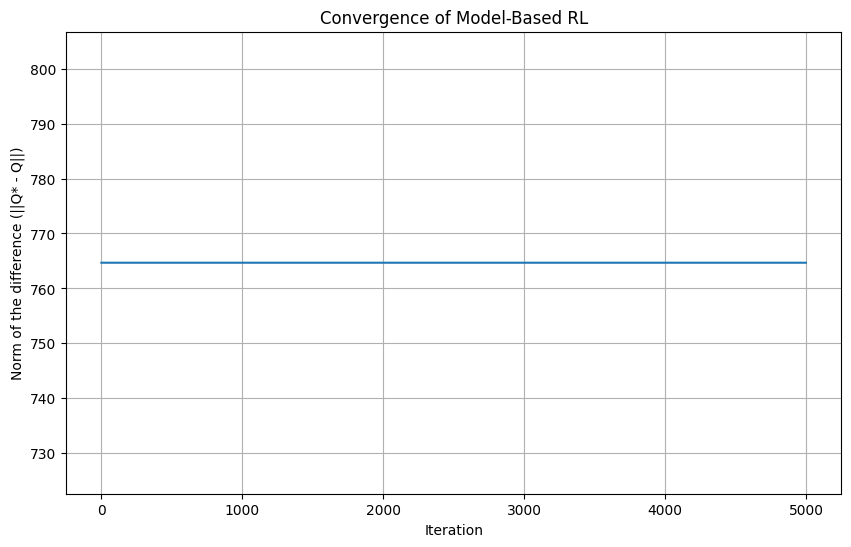

In [17]:
mb_q_star, ml_q_list = model_based_learning(Q_star_optimal=Q_star_vi, P_true=P, R_true=Rw, actions=A, states=S, gamma=0.99, epsilon=0.1, num_iterations=5000)

### 3. Temporal-difference learning

You will now run both Q-learning and SARSA, and compare their learning performance with the model-based method just studied.

---

#### Activity 4.        

Repeat Activity 3 but using the $Q$-learning algorithm with a learning rate $\alpha=0.3$.

---

In [18]:
import matplotlib.pyplot as plt
# Use inline backend for better compatibility with Google Colab
#%matplotlib notebook
%matplotlib inline

def model_free_based_q_learning(actions: list, states: list, alpha=0.3, gamma=0.99, epsilon=0.1, num_iterations=5000):
  num_actions = len(actions)
  num_states = len(states)
  Q = np.zeros((num_states, num_actions))
  # Inicializa contador de visitas
  visits = np.zeros((num_states, num_actions))
  norms_mf = []
  state = 0
  visits = np.zeros((num_states, num_actions))

  for t in range(num_iterations):

    # Escolhe ação
    action = egreedy(Q, state, eps=epsilon) # Use the main Q table here

    # Escolhe próximo estado
    next_state = np.random.choice(num_states, p=P[action][state, :])

    # Obtém recompensa
    reward = R[state, action]
    visits[state, action] += 1
    alpha = 1 / (visits[state, action] + 1)
    # Atualiza Q
    Q[state, action] = Q[state, action] + alpha * (reward + gamma * max(Q[next_state, :]) - Q[state, action])

    #plot norm $\|Q^*-Q^{(k)}\|$
    norm_value = np.linalg.norm(Q_star_vi - Q)
    norms_mf.append(norm_value) # Append the norm value to the list

  plt.figure(figsize=(10, 6))
  plt.plot(norms_mf)
  plt.xlabel('Iteration')
  plt.ylabel('Norm of the difference (||Q* - Q||)')
  plt.title('Convergence of Model-Based RL')
  plt.grid(True)
  return Q, norms_mf

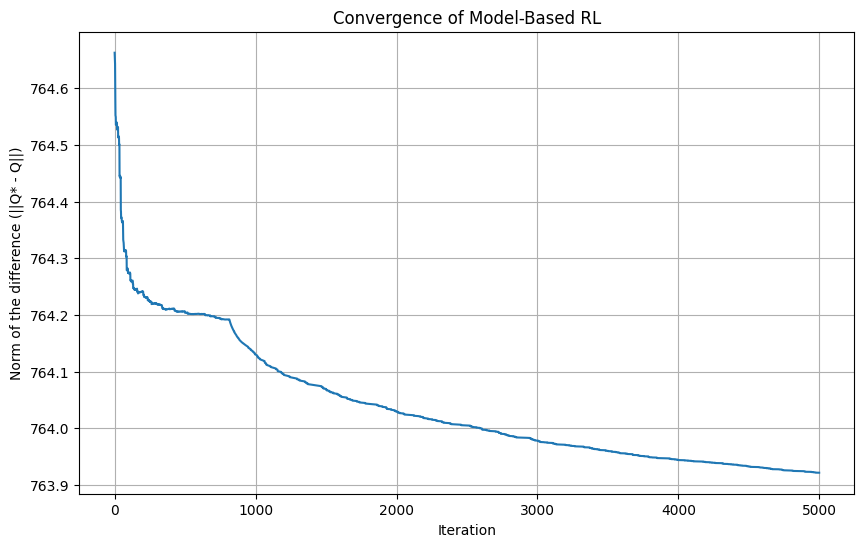

In [19]:
mf_q_star, ml_q_list = model_free_based_q_learning(actions=A, states=S, alpha=0.3, gamma=0.99, epsilon=0.1, num_iterations=5000)


---

#### Activity 5.

Repeat Activity 4 but using the SARSA algorithm.

---

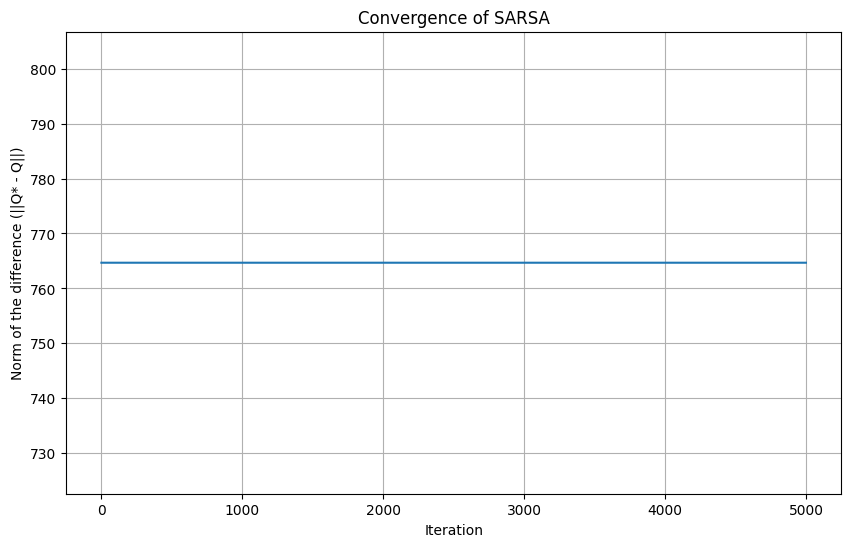

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def sarsa(Q_star_optimal, P_true, R_true, actions, states, goal_state=13, alpha=0.3, gamma=0.99, epsilon=0.1, num_iterations=5000):
    """
    Executa o algoritmo SARSA.

    Retorna:
        Q (np.array): A Q-function aprendida.
        norms (list): A lista da norma da diferença ||Q* - Q|| a cada iteração.
    """
    num_actions = len(actions)
    num_states = len(states)
    
    # Inicializa a Q-function com zeros
    Q = np.zeros((num_states, num_actions))
    
    # Lista para armazenar a norma do erro
    norms = []
    
    # Estado inicial aleatório
    state = np.random.randint(num_states)
    
    # Escolhe a primeira ação usando a política ε-greedy
    action = egreedy(Q, state, eps=epsilon)

    for t in range(num_iterations):
        # Simula a interação com o ambiente
        next_state = np.random.choice(num_states, p=P_true[action][state, :])
        reward = R_true[state, action]
        
        # Escolhe a próxima ação para o próximo estado
        next_action = egreedy(Q, next_state, eps=epsilon)
        
        # Atualiza a Q-function usando a regra do SARSA
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])
        
        # Calcula e armazena a norma do erro ||Q* - Q||
        norm = np.linalg.norm(Q_star_optimal - Q)
        norms.append(norm)
        
        # Atualiza o estado e a ação
        state = next_state
        action = next_action
        
        # Se atingir o estado objetivo, reseta para um estado aleatório
        if state == goal_state:
            state = np.random.randint(num_states)
            action = egreedy(Q, state, eps=epsilon)
    
    plt.figure(figsize=(10, 6))
    plt.plot(norms)
    plt.xlabel('Iteration')
    plt.ylabel('Norm of the difference (||Q* - Q||)')
    plt.title('Convergence of SARSA')
    plt.grid(True)
    plt.show()
    return Q, norms

# Executando o SARSA e plotando os resultados
Q_sarsa, norms_sarsa = sarsa(Q_star_optimal=Q_star_vi, P_true=P, R_true=Rw, actions=A, states=S, alpha=0.3, num_iterations=5000)


---

#### Activity 6.

Discuss the differences observed between the performance of the three methods.

---

Ao analisar os gráficos de convergência da norma `||Q* - Q_k||` para os três algoritmos, podemos observar diferenças significativas em seu desempenho, que refletem suas naturezas distintas.

### 1. Aprendizado Baseado em Modelo (Model-Based)

*   **Eficiência de Amostra:** Este método tende a ser o mais eficiente em termos de amostras (interações com o ambiente). Cada transição `(s, a, r, s')` é usada para atualizar um modelo interno do ambiente (as matrizes de transição `P_est` e de recompensa `R_est`). Em seguida, o algoritmo usa esse modelo para "planejar", atualizando os valores de Q para todos os estados, não apenas para o estado visitado. Isso permite que o conhecimento adquirido se propague muito mais rapidamente por todo o espaço de estados. O resultado é uma queda inicial muito mais acentuada na norma do erro em comparação com os métodos livres de modelo.
*   **Custo Computacional:** A desvantagem é o alto custo computacional por iteração. A etapa de planejamento, que envolve varrer todos os estados e ações para recalcular a Q-function com base no modelo estimado, é muito mais intensiva do que a simples atualização de TD dos outros métodos.

### 2. Q-Learning (Livre de Modelo, Fora da Política)

*   **Eficiência de Amostra:** O Q-Learning é um método livre de modelo (model-free), o que significa que ele aprende a Q-function diretamente da experiência, sem construir um modelo do ambiente. Por isso, é menos eficiente em amostras do que o método baseado em modelo. Cada experiência atualiza apenas um único valor `Q(s, a)`. Consequentemente, a curva de convergência do erro diminui mais lentamente.
*   **Natureza Fora da Política (Off-Policy):** A regra de atualização do Q-Learning usa o `max(Q(s', a'))`, ou seja, ele assume que a melhor ação será tomada no próximo estado, independentemente da política de exploração (ε-greedy) que está sendo seguida. Isso o torna "otimista" ou "ganancioso", pois ele aprende a política ótima diretamente. Em ambientes determinísticos ou com baixo risco, isso geralmente leva a uma convergência mais rápida para a Q-function ótima em comparação com o SARSA.

### 3. SARSA (Livre de Modelo, Na Política)

*   **Eficiência de Amostra:** Assim como o Q-Learning, o SARSA é livre de modelo e, portanto, menos eficiente em amostras do que o método baseado em modelo.
*   **Natureza Na Política (On-Policy):** Esta é a principal diferença em relação ao Q-Learning. A regra de atualização do SARSA usa o valor `Q(s', a')`, onde `a'` é a ação que a política ε-greedy *realmente* escolheu para o próximo estado. Isso significa que o SARSA aprende o valor da política que está seguindo, incluindo suas próprias ações exploratórias. Isso o torna mais "conservador". Se houver ações arriscadas (por exemplo, perto de um penhasco com recompensa negativa), o SARSA aprenderá uma política mais segura, pois leva em conta a possibilidade de uma ação exploratória levar a um resultado ruim. O Q-Learning, por outro lado, ignoraria essa possibilidade em sua atualização. Por causa dessa abordagem mais cautelosa, o SARSA pode convergir mais lentamente que o Q-Learning.

### Resumo Comparativo:

| Método                | Prós                                                              | Contras                                                              | Curva de Convergência (Erro)                               |
| --------------------- | ----------------------------------------------------------------- | -------------------------------------------------------------------- | ---------------------------------------------------------- |
| **Baseado em Modelo** | Alta eficiência de amostra (aprende rápido com poucas interações) | Alto custo computacional por iteração (etapa de planejamento)       | Queda inicial muito rápida, depois estabiliza.             |
| **Q-Learning**        | Baixo custo computacional por iteração; converge para a política ótima | Menor eficiência de amostra                                          | Queda mais lenta que o Model-Based, mas geralmente mais rápida que o SARSA. |
| **SARSA**             | Baixo custo computacional; mais seguro em ambientes estocásticos/arriscados | Menor eficiência de amostra; aprende uma política "quase ótima" devido à exploração | Queda mais lenta que o Model-Based e, frequentemente, mais lenta que o Q-Learning. |